# Install some required packages

In [303]:
!conda install -y python-graphviz
!pip install pydotplus

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    python-graphviz-0.20.1     |     pyh22cad53_0          35 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  python-graphviz    conda-forge/noarch::python-graphviz-0.20.1-pyh22cad53_0

The following packages will be UPDATED:

  ca-certificates                    2022.6.15.2-ha878542_0 --> 2022.9.24-ha878542_0
  certifi                     

In [348]:
!pip install sklearn

In [353]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score
from six import StringIO
import warnings
warnings.filterwarnings('ignore')
sns.set()

# 1. Read your Titanic dataset as usual: Training set and Testing set Apply decision tree.

In [354]:
data=pd.read_csv('../input/titanic/titanic-passengers (1).csv',sep=';')
data.head(10)

PassengerId Survived  Pclass  \
0          343       No       2   
1           76       No       3   
2          641       No       3   
3          568       No       3   
4          672       No       1   
5          105       No       3   
6          576       No       3   
7          382      Yes       3   
8          228       No       3   
9          433      Yes       2   

                                                Name     Sex      Age  SibSp  \
0                         Collander, Mr. Erik Gustaf    male 28.00000      0   
1                            Moen, Mr. Sigurd Hansen    male 25.00000      0   
2                             Jensen, Mr. Hans Peder    male 20.00000      0   
3        Palsson, Mrs. Nils (Alma Cornelia Berglund)  female 29.00000      0   
4                             Davidson, Mr. Thornton    male 31.00000      1   
5                     Gustafsson, Mr. Anders Vilhelm    male 37.00000      2   
6                               Patchett, Mr. George    male 19.00000      0   
7                        Nakid, Miss. Maria ("Mary")  female  1.00000      0   
8                    Lovell, Mr. John Hall ("Henry")    male 20.50000      0   
9  Louch, Mrs. Charles Alexander (Alice Adelaide ...  female 42.00000      1   

   Parch      Ticket     Fare  Cabin Embarked  
0      0      248740 13.00000    NaN        S  
1      0      348123  7.65000  F G73        S  
2      0      350050  7.85420    NaN        S  
3      4      349909 21.07500    NaN        S  
4      0  F.C. 12750 52.00000    B71        S  
5      0     3101276  7.92500    NaN        S  
6      0      358585 14.50000    NaN        S  
7      2        2653 15.74170    NaN        C  
8      0   A/5 21173  7.25000    NaN        S  
9      0  SC/AH 3085 26.00000    NaN        S

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


## Data preprocessing

In [356]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data['Cabin'] = data['Cabin'].fillna("U0")
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(int)
data

PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex      Age  \
0                           Collander, Mr. Erik Gustaf    male 28.00000   
1                              Moen, Mr. Sigurd Hansen    male 25.00000   
2                               Jensen, Mr. Hans Peder    male 20.00000   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female 29.00000   
4                               Davidson, Mr. Thornton    male 31.00000   
..                                                 ...     ...      ...   
886                Nasser, Mrs. Nicholas (Adele Achem)  female 14.00000   
887                              Sirayanian, Mr. Orsen    male 22.00000   
888                                Cacic, Miss. Marija  female 30.00000   
889                   Petroff, Mr. Pastcho ("Pentcho")    male      NaN   
890  Phillips, Miss. Kate Florence ("Mrs Kate Louis...  female 19.00000   

     SibSp  Parch      Ticket     Fare  Cabin Embarked  Deck  
0        0      0      248740 13.00000     U0        S     8  
1        0      0      348123  7.65000  F G73        S     6  
2        0      0      350050  7.85420     U0        S     8  
3        0      4      349909 21.07500     U0        S     8  
4        1      0  F.C. 12750 52.00000    B71        S     2  
..     ...    ...         ...      ...    ...      ...   ...  
886      1      0      237736 30.07080     U0        C     8  
887      0      0        2669  7.22920     U0        C     8  
888      0      0      315084  8.66250     U0        S     8  
889      0      0      349215  7.89580     U0        S     8  
890      0      0      250655 26.00000     U0        S     8  

[891 rows x 13 columns]

In [357]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)
data

PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex  Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male   28      0   
1                              Moen, Mr. Sigurd Hansen    male   25      0   
2                               Jensen, Mr. Hans Peder    male   20      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female   29      0   
4                               Davidson, Mr. Thornton    male   31      1   
..                                                 ...     ...  ...    ...   
886                Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   
887                              Sirayanian, Mr. Orsen    male   22      0   
888                                Cacic, Miss. Marija  female   30      0   
889                   Petroff, Mr. Pastcho ("Pentcho")    male   24      0   
890  Phillips, Miss. Kate Florence ("Mrs Kate Louis...  female   19      0   

     Parch      Ticket     Fare  Cabin Embarked  Deck  
0        0      248740 13.00000     U0        S     8  
1        0      348123  7.65000  F G73        S     6  
2        0      350050  7.85420     U0        S     8  
3        4      349909 21.07500     U0        S     8  
4        0  F.C. 12750 52.00000    B71        S     2  
..     ...         ...      ...    ...      ...   ...  
886      0      237736 30.07080     U0        C     8  
887      0        2669  7.22920     U0        C     8  
888      0      315084  8.66250     U0        S     8  
889      0      349215  7.89580     U0        S     8  
890      0      250655 26.00000     U0        S     8  

[891 rows x 13 columns]

In [358]:
sex_dict={"Sex":{"female":0,"male":1}}
data=data.replace(sex_dict)
data['Title']=data.apply(lambda row: row["Name"].split('.')[0].split(',')[1].strip(), axis=1)
data["Embarked"]=data["Embarked"].fillna(value="S")
data=data.drop(["PassengerId","Cabin"],axis=1)
data.head()

Survived  Pclass                                         Name  Sex  Age  \
0       No       2                   Collander, Mr. Erik Gustaf    1   28   
1       No       3                      Moen, Mr. Sigurd Hansen    1   25   
2       No       3                       Jensen, Mr. Hans Peder    1   20   
3       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   29   
4       No       1                       Davidson, Mr. Thornton    1   31   

   SibSp  Parch      Ticket     Fare Embarked  Deck Title  
0      0      0      248740 13.00000        S     8    Mr  
1      0      0      348123  7.65000        S     6    Mr  
2      0      0      350050  7.85420        S     8    Mr  
3      0      4      349909 21.07500        S     8   Mrs  
4      1      0  F.C. 12750 52.00000        S     2    Mr

In [359]:
data[["Title","Survived"]].groupby("Title").count().sort_values(by="Survived")

Survived
Title                 
Capt                 1
Ms                   1
Mme                  1
Sir                  1
Lady                 1
the Countess         1
Don                  1
Jonkheer             1
Major                2
Mlle                 2
Col                  2
Rev                  6
Dr                   7
Master              40
Mrs                125
Miss               182
Mr                 517

In [360]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'the Countess' ], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data[["Title","Survived"]].groupby("Title").count().sort_values(by="Survived")

Survived
Title           
Rare          23
Master        40
Mrs          126
Miss         185
Mr           517

In [361]:
data

Survived  Pclass                                               Name  Sex  \
0         No       2                         Collander, Mr. Erik Gustaf    1   
1         No       3                            Moen, Mr. Sigurd Hansen    1   
2         No       3                             Jensen, Mr. Hans Peder    1   
3         No       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   
4         No       1                             Davidson, Mr. Thornton    1   
..       ...     ...                                                ...  ...   
886      Yes       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
887       No       3                              Sirayanian, Mr. Orsen    1   
888       No       3                                Cacic, Miss. Marija    0   
889       No       3                   Petroff, Mr. Pastcho ("Pentcho")    1   
890      Yes       2  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    0   

     Age  SibSp  Parch      Ticket     Fare Embarked  Deck Title  
0     28      0      0      248740 13.00000        S     8    Mr  
1     25      0      0      348123  7.65000        S     6    Mr  
2     20      0      0      350050  7.85420        S     8    Mr  
3     29      0      4      349909 21.07500        S     8   Mrs  
4     31      1      0  F.C. 12750 52.00000        S     2    Mr  
..   ...    ...    ...         ...      ...      ...   ...   ...  
886   14      1      0      237736 30.07080        C     8   Mrs  
887   22      0      0        2669  7.22920        C     8    Mr  
888   30      0      0      315084  8.66250        S     8  Miss  
889   24      0      0      349215  7.89580        S     8    Mr  
890   19      0      0      250655 26.00000        S     8  Miss  

[891 rows x 12 columns]

In [362]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

In [363]:
data.drop(['Ticket'], axis = 1, inplace = True) 

In [364]:
data

Survived  Pclass                                               Name  Sex  \
0         No       2                         Collander, Mr. Erik Gustaf    1   
1         No       3                            Moen, Mr. Sigurd Hansen    1   
2         No       3                             Jensen, Mr. Hans Peder    1   
3         No       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   
4         No       1                             Davidson, Mr. Thornton    1   
..       ...     ...                                                ...  ...   
886      Yes       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
887       No       3                              Sirayanian, Mr. Orsen    1   
888       No       3                                Cacic, Miss. Marija    0   
889       No       3                   Petroff, Mr. Pastcho ("Pentcho")    1   
890      Yes       2  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    0   

     Age  SibSp  Parch     Fare Embarked  Deck Title  
0     28      0      0 13.00000        S     8    Mr  
1     25      0      0  7.65000        S     6    Mr  
2     20      0      0  7.85420        S     8    Mr  
3     29      0      4 21.07500        S     8   Mrs  
4     31      1      0 52.00000        S     2    Mr  
..   ...    ...    ...      ...      ...   ...   ...  
886   14      1      0 30.07080        C     8   Mrs  
887   22      0      0  7.22920        C     8    Mr  
888   30      0      0  8.66250        S     8  Miss  
889   24      0      0  7.89580        S     8    Mr  
890   19      0      0 26.00000        S     8  Miss  

[891 rows x 11 columns]

<AxesSubplot:>

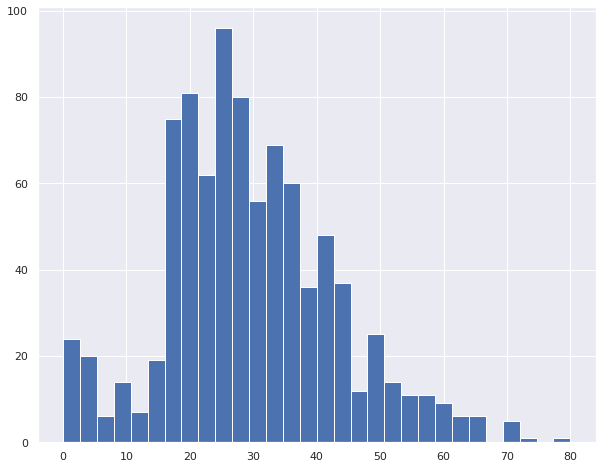

In [365]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
data['Age'].hist(bins=30)

In [366]:
def generation(age):
    if age < 1:
        return 'Baby'
    elif age < 3:
        return 'Toddler'
    elif age < 15:
        return 'Child'
    elif age < 18:
        return 'Teenager'
    elif age < 21:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Retired'
data['Generation']=data['Age'].apply(generation)
data

Survived  Pclass                                               Name  Sex  \
0         No       2                         Collander, Mr. Erik Gustaf    1   
1         No       3                            Moen, Mr. Sigurd Hansen    1   
2         No       3                             Jensen, Mr. Hans Peder    1   
3         No       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   
4         No       1                             Davidson, Mr. Thornton    1   
..       ...     ...                                                ...  ...   
886      Yes       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
887       No       3                              Sirayanian, Mr. Orsen    1   
888       No       3                                Cacic, Miss. Marija    0   
889       No       3                   Petroff, Mr. Pastcho ("Pentcho")    1   
890      Yes       2  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    0   

     Age  SibSp  Parch     Fare Embarked  Deck Title   Generation  
0     28      0      0 13.00000        S     8    Mr        Adult  
1     25      0      0  7.65000        S     6    Mr        Adult  
2     20      0      0  7.85420        S     8    Mr  Young Adult  
3     29      0      4 21.07500        S     8   Mrs        Adult  
4     31      1      0 52.00000        S     2    Mr        Adult  
..   ...    ...    ...      ...      ...   ...   ...          ...  
886   14      1      0 30.07080        C     8   Mrs        Child  
887   22      0      0  7.22920        C     8    Mr        Adult  
888   30      0      0  8.66250        S     8  Miss        Adult  
889   24      0      0  7.89580        S     8    Mr        Adult  
890   19      0      0 26.00000        S     8  Miss  Young Adult  

[891 rows x 12 columns]

In [367]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Embarked']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data=data.drop(["Embarked"],axis=1).join(d)
data

Survived  Pclass                                               Name  Sex  \
0         No       2                         Collander, Mr. Erik Gustaf    1   
1         No       3                            Moen, Mr. Sigurd Hansen    1   
2         No       3                             Jensen, Mr. Hans Peder    1   
3         No       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   
4         No       1                             Davidson, Mr. Thornton    1   
..       ...     ...                                                ...  ...   
886      Yes       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
887       No       3                              Sirayanian, Mr. Orsen    1   
888       No       3                                Cacic, Miss. Marija    0   
889       No       3                   Petroff, Mr. Pastcho ("Pentcho")    1   
890      Yes       2  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    0   

     Age  SibSp  Parch     Fare  Deck Title   Generation     f_Q     f_S  
0     28      0      0 13.00000     8    Mr        Adult 0.00000 1.00000  
1     25      0      0  7.65000     6    Mr        Adult 0.00000 1.00000  
2     20      0      0  7.85420     8    Mr  Young Adult 0.00000 1.00000  
3     29      0      4 21.07500     8   Mrs        Adult 0.00000 1.00000  
4     31      1      0 52.00000     2    Mr        Adult 0.00000 1.00000  
..   ...    ...    ...      ...   ...   ...          ...     ...     ...  
886   14      1      0 30.07080     8   Mrs        Child 0.00000 0.00000  
887   22      0      0  7.22920     8    Mr        Adult 0.00000 0.00000  
888   30      0      0  8.66250     8  Miss        Adult 0.00000 1.00000  
889   24      0      0  7.89580     8    Mr        Adult 0.00000 1.00000  
890   19      0      0 26.00000     8  Miss  Young Adult 0.00000 1.00000  

[891 rows x 13 columns]

In [368]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Generation']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data=data.drop(["Generation"],axis=1).join(d)
data

Survived  Pclass                                               Name  Sex  \
0         No       2                         Collander, Mr. Erik Gustaf    1   
1         No       3                            Moen, Mr. Sigurd Hansen    1   
2         No       3                             Jensen, Mr. Hans Peder    1   
3         No       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   
4         No       1                             Davidson, Mr. Thornton    1   
..       ...     ...                                                ...  ...   
886      Yes       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
887       No       3                              Sirayanian, Mr. Orsen    1   
888       No       3                                Cacic, Miss. Marija    0   
889       No       3                   Petroff, Mr. Pastcho ("Pentcho")    1   
890      Yes       2  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    0   

     Age  SibSp  Parch     Fare  Deck Title     f_Q     f_S  f_Baby  f_Child  \
0     28      0      0 13.00000     8    Mr 0.00000 1.00000 0.00000  0.00000   
1     25      0      0  7.65000     6    Mr 0.00000 1.00000 0.00000  0.00000   
2     20      0      0  7.85420     8    Mr 0.00000 1.00000 0.00000  0.00000   
3     29      0      4 21.07500     8   Mrs 0.00000 1.00000 0.00000  0.00000   
4     31      1      0 52.00000     2    Mr 0.00000 1.00000 0.00000  0.00000   
..   ...    ...    ...      ...   ...   ...     ...     ...     ...      ...   
886   14      1      0 30.07080     8   Mrs 0.00000 0.00000 0.00000  1.00000   
887   22      0      0  7.22920     8    Mr 0.00000 0.00000 0.00000  0.00000   
888   30      0      0  8.66250     8  Miss 0.00000 1.00000 0.00000  0.00000   
889   24      0      0  7.89580     8    Mr 0.00000 1.00000 0.00000  0.00000   
890   19      0      0 26.00000     8  Miss 0.00000 1.00000 0.00000  0.00000   

     f_Middle-aged  f_Retired  f_Teenager  f_Toddler  f_Young Adult  
0          0.00000    0.00000     0.00000    0.00000        0.00000  
1          0.00000    0.00000     0.00000    0.00000        0.00000  
2          0.00000    0.00000     0.00000    0.00000        1.00000  
3          0.00000    0.00000     0.00000    0.00000        0.00000  
4          0.00000    0.00000     0.00000    0.00000        0.00000  
..             ...        ...         ...        ...            ...  
886        0.00000    0.00000     0.00000    0.00000        0.00000  
887        0.00000    0.00000     0.00000    0.00000        0.00000  
888        0.00000    0.00000     0.00000    0.00000        0.00000  
889        0.00000    0.00000     0.00000    0.00000        0.00000  
890        0.00000    0.00000     0.00000    0.00000        1.00000  

[891 rows x 19 columns]

In [369]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Title']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data=data.drop(["Title"],axis=1).join(d)
data

Survived  Pclass                                               Name  Sex  \
0         No       2                         Collander, Mr. Erik Gustaf    1   
1         No       3                            Moen, Mr. Sigurd Hansen    1   
2         No       3                             Jensen, Mr. Hans Peder    1   
3         No       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)    0   
4         No       1                             Davidson, Mr. Thornton    1   
..       ...     ...                                                ...  ...   
886      Yes       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
887       No       3                              Sirayanian, Mr. Orsen    1   
888       No       3                                Cacic, Miss. Marija    0   
889       No       3                   Petroff, Mr. Pastcho ("Pentcho")    1   
890      Yes       2  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    0   

     Age  SibSp  Parch     Fare  Deck     f_Q  ...  f_Child  f_Middle-aged  \
0     28      0      0 13.00000     8 0.00000  ...  0.00000        0.00000   
1     25      0      0  7.65000     6 0.00000  ...  0.00000        0.00000   
2     20      0      0  7.85420     8 0.00000  ...  0.00000        0.00000   
3     29      0      4 21.07500     8 0.00000  ...  0.00000        0.00000   
4     31      1      0 52.00000     2 0.00000  ...  0.00000        0.00000   
..   ...    ...    ...      ...   ...     ...  ...      ...            ...   
886   14      1      0 30.07080     8 0.00000  ...  1.00000        0.00000   
887   22      0      0  7.22920     8 0.00000  ...  0.00000        0.00000   
888   30      0      0  8.66250     8 0.00000  ...  0.00000        0.00000   
889   24      0      0  7.89580     8 0.00000  ...  0.00000        0.00000   
890   19      0      0 26.00000     8 0.00000  ...  0.00000        0.00000   

     f_Retired  f_Teenager  f_Toddler  f_Young Adult  f_Miss    f_Mr   f_Mrs  \
0      0.00000     0.00000    0.00000        0.00000 0.00000 1.00000 0.00000   
1      0.00000     0.00000    0.00000        0.00000 0.00000 1.00000 0.00000   
2      0.00000     0.00000    0.00000        1.00000 0.00000 1.00000 0.00000   
3      0.00000     0.00000    0.00000        0.00000 0.00000 0.00000 1.00000   
4      0.00000     0.00000    0.00000        0.00000 0.00000 1.00000 0.00000   
..         ...         ...        ...            ...     ...     ...     ...   
886    0.00000     0.00000    0.00000        0.00000 0.00000 0.00000 1.00000   
887    0.00000     0.00000    0.00000        0.00000 0.00000 1.00000 0.00000   
888    0.00000     0.00000    0.00000        0.00000 1.00000 0.00000 0.00000   
889    0.00000     0.00000    0.00000        0.00000 0.00000 1.00000 0.00000   
890    0.00000     0.00000    0.00000        1.00000 1.00000 0.00000 0.00000   

     f_Rare  
0   0.00000  
1   0.00000  
2   0.00000  
3   0.00000  
4   0.00000  
..      ...  
886 0.00000  
887 0.00000  
888 0.00000  
889 0.00000  
890 0.00000  

[891 rows x 22 columns]

In [370]:
data.drop(['Name'], axis = 1, inplace = True) 

In [371]:
data['Survived'] = data['Survived'].replace("Yes", 1)
data['Survived'] = data['Survived'].replace("No", 0)

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    int64  
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Deck           891 non-null    int64  
 8   f_Q            891 non-null    float64
 9   f_S            891 non-null    float64
 10  f_Baby         891 non-null    float64
 11  f_Child        891 non-null    float64
 12  f_Middle-aged  891 non-null    float64
 13  f_Retired      891 non-null    float64
 14  f_Teenager     891 non-null    float64
 15  f_Toddler      891 non-null    float64
 16  f_Young Adult  891 non-null    float64
 17  f_Miss         891 non-null    float64
 18  f_Mr      

## Apply Decision Tree

In [373]:
X=data.drop(["Survived"],axis=1)
Y=data["Survived"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [374]:
clf_tree = DecisionTreeClassifier(criterion='gini', random_state=17)
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=17)

In [375]:
print(f'Mean Training Accuracy Score: {clf_tree.score(x_train,y_train):.3f}')
print(f'Test Training Accuracy Score: {clf_tree.score(x_test,y_test):.3f}')

Mean Training Accuracy Score: 0.987
Test Training Accuracy Score: 0.799


In [376]:
y_hat=clf_tree.predict(x_test)
print("Performance of the Decision Tree classifier = {:.2f}".format(metrics.roc_auc_score(y_test, y_hat)))

Performance of the Decision Tree classifier = 0.79


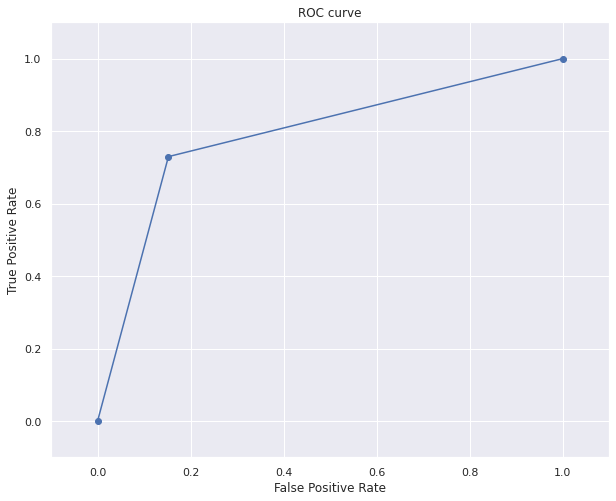

In [377]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

We can see that the model is **overfitted**. In fact Accuracy on Training dataset is much more than that on Test dataset

# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

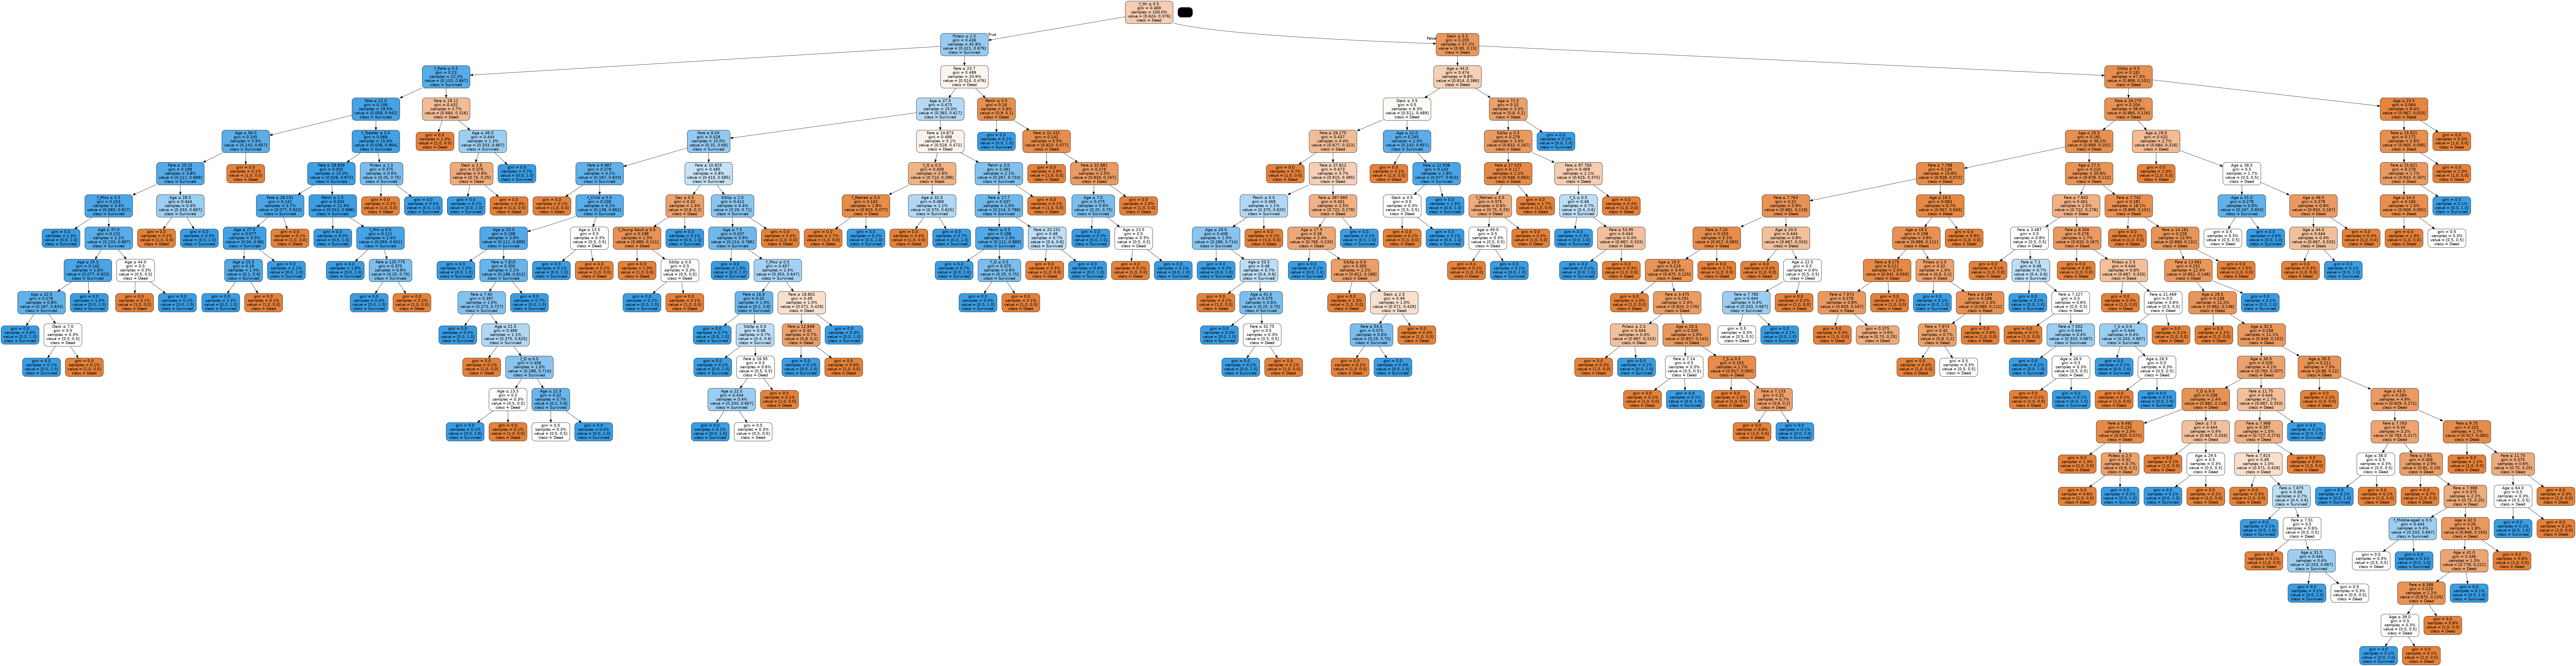

In [378]:
dot_data = StringIO()
tree.export_graphviz(clf_tree, out_file=dot_data, label='all',proportion=True, 
                filled=True, rounded=True, feature_names=X.columns,class_names=["Dead","Survived"],
                special_characters=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# 3. Change the decision tree parameters (change at least two parameters)

In [379]:
tree_params = {'max_depth': range(3,15),
               'max_features': range(5,15),
               'max_leaf_nodes': range(5,20),
               'min_samples_leaf': range(5,20)}

tree_grid = GridSearchCV(clf_tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 27000 candidates, totalling 135000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': range(5, 15),
                         'max_leaf_nodes': range(5, 20),
                         'min_samples_leaf': range(5, 20)},
             verbose=True)

In [380]:
tree_grid.best_params_

{'max_depth': 10,
 'max_features': 10,
 'max_leaf_nodes': 19,
 'min_samples_leaf': 5}

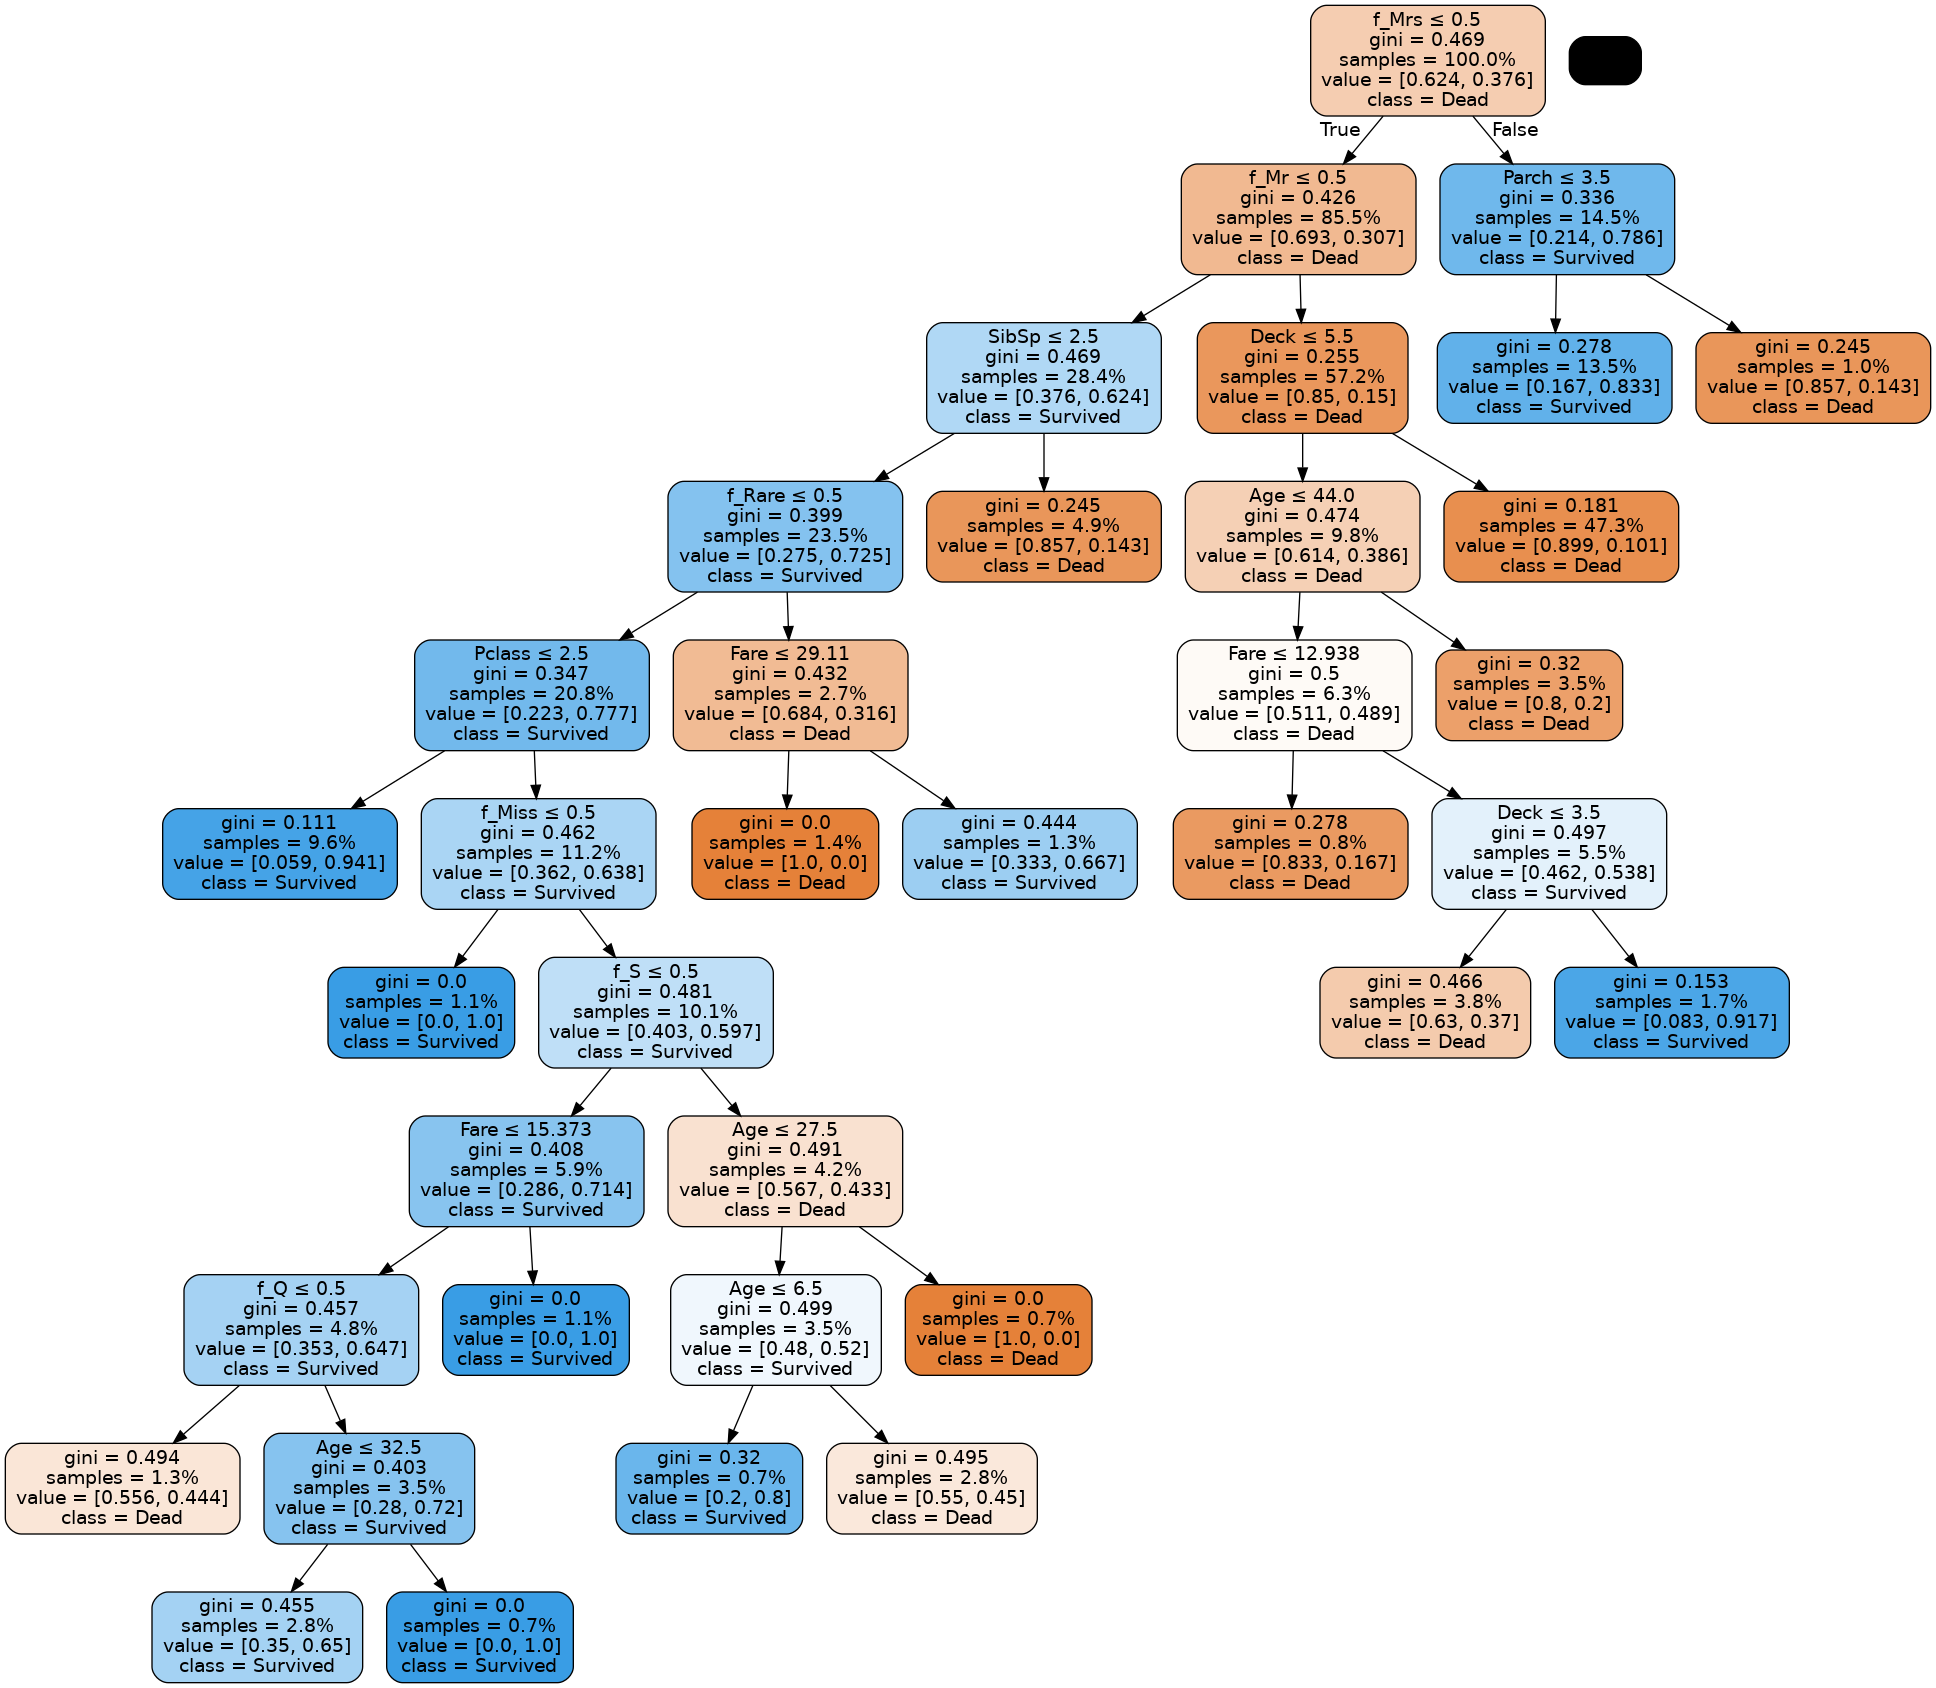

In [381]:
dot_data = StringIO()
tree.export_graphviz(tree_grid.best_estimator_, out_file=dot_data, label='all',proportion=True, 
                filled=True, rounded=True, feature_names=X.columns,class_names=["Dead","Survived"],
                special_characters=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 4. Calculate the new accuracy and compare it with the previous results. 

In [382]:
print(f'Mean Training Accuracy Score: {tree_grid.best_score_:.3f}')
print(f'Test Training Accuracy Score: {tree_grid.best_estimator_.score(x_test,y_test):.3f}')

Mean Training Accuracy Score: 0.836
Test Training Accuracy Score: 0.832


Despite the new model Training accuracy is less than the first one, it's **not overfitted** . In fact Trainning and test accuracy are close to each other 

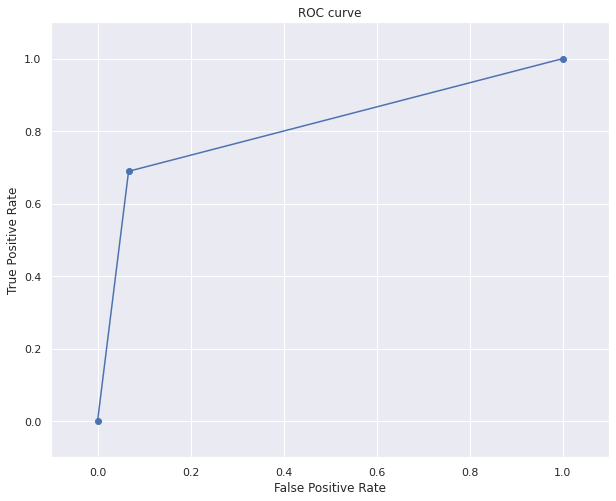

In [383]:
y_hat2=tree_grid.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat2)
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [384]:
print("Performance of the Decision Tree classifier = {:.3f}".format(metrics.roc_auc_score(y_test, y_hat2)))

Performance of the Decision Tree classifier = 0.811


# 5. Use random forest then change the number of estimators

In [385]:
clf=RandomForestClassifier(n_estimators=50, **tree_grid.best_params_)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, max_leaf_nodes=19,
                       min_samples_leaf=5, n_estimators=50)

# 6. Calculate the new accuracy and compare it with the previous result.

In [386]:
print(f'Mean Training Accuracy Score: {clf.score(x_train,y_train):.3f}')
print(f'Test Training Accuracy Score: {clf.score(x_test,y_test):.3f}')

Mean Training Accuracy Score: 0.882
Test Training Accuracy Score: 0.827


The Accuracy of the random forest classifier is **better** than the tunned Decision Tree classifier found using grid search

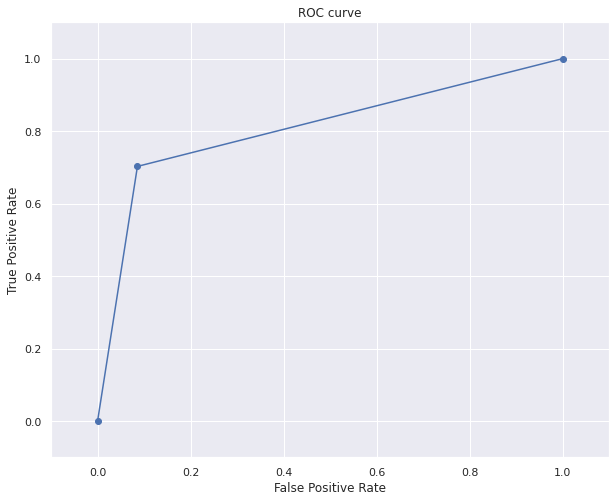

In [387]:
y_hat3=clf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat3)
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [388]:
print("Performance of the Random Forest classifier = {:.3f}".format(metrics.roc_auc_score(y_test, y_hat3)))

Performance of the Random Forest classifier = 0.808
